## **1. Imports**

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## **2. Load Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()  # Opens a file picker

Saving insurance.csv to insurance.csv


## **3. Create a Dataframe**

In [4]:
data = pd.read_csv('insurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## **4. Data Preprocessing**

In [16]:
# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Remove outliers using IQR method for numeric columns
for col in numeric_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Features and target
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Define preprocessing for numeric and categorical features

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output=False, drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess features
X_processed = preprocessor.fit_transform(X)

## **5. Train-Test-Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## **6. Training Linear Regression Model**

In [18]:
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)

LinearRegression()

## **7. Applying Model to Testing Data**

In [19]:
y_pred = lr_sklearn.predict(X_test)

## **8. Evaluating Model using MSE and R-squared error**

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 33596915.85
R² Score: 0.78


## **9. Visualizing Actual vs. Predicted values**

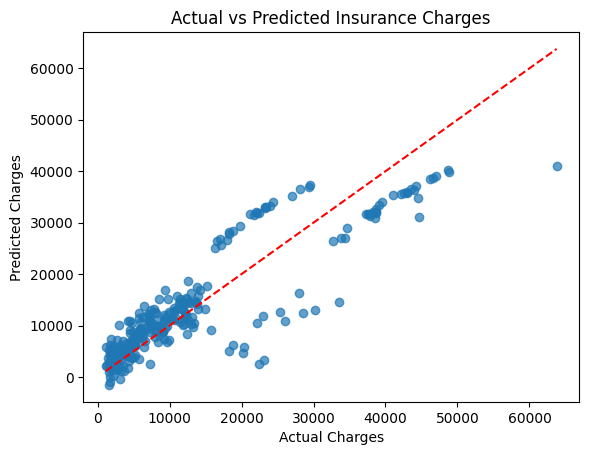

In [21]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## **10. Interactive Predictor**

In [23]:
print("\nEnter patient details to predict insurance charges:")
try:
  age = int(input("Age: "))
  sex = input("Sex (male/female): ").strip().lower()
  bmi = float(input("BMI: "))
  children = int(input("Number of children: "))
  smoker = input("Smoker? (yes/no): ").strip().lower()
  region = input("Region (northeast/southeast/southwest/northwest): ").strip().lower()

  user_df = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
                         columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
  user_processed = preprocessor.transform(user_df)
  predicted_charge = lr_sklearn.predict(user_processed)
  print(f"\nPredicted insurance charge: ${predicted_charge[0]:.2f}")
except Exception as e:
  print("Error:", e)


Enter patient details to predict insurance charges:
Age: 19
Sex (male/female): female
BMI: 28.5
Number of children: 2
Smoker? (yes/no): yes
Region (northeast/southeast/southwest/northwest): northwest

Predicted insurance charge: $26689.47
